In [3]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

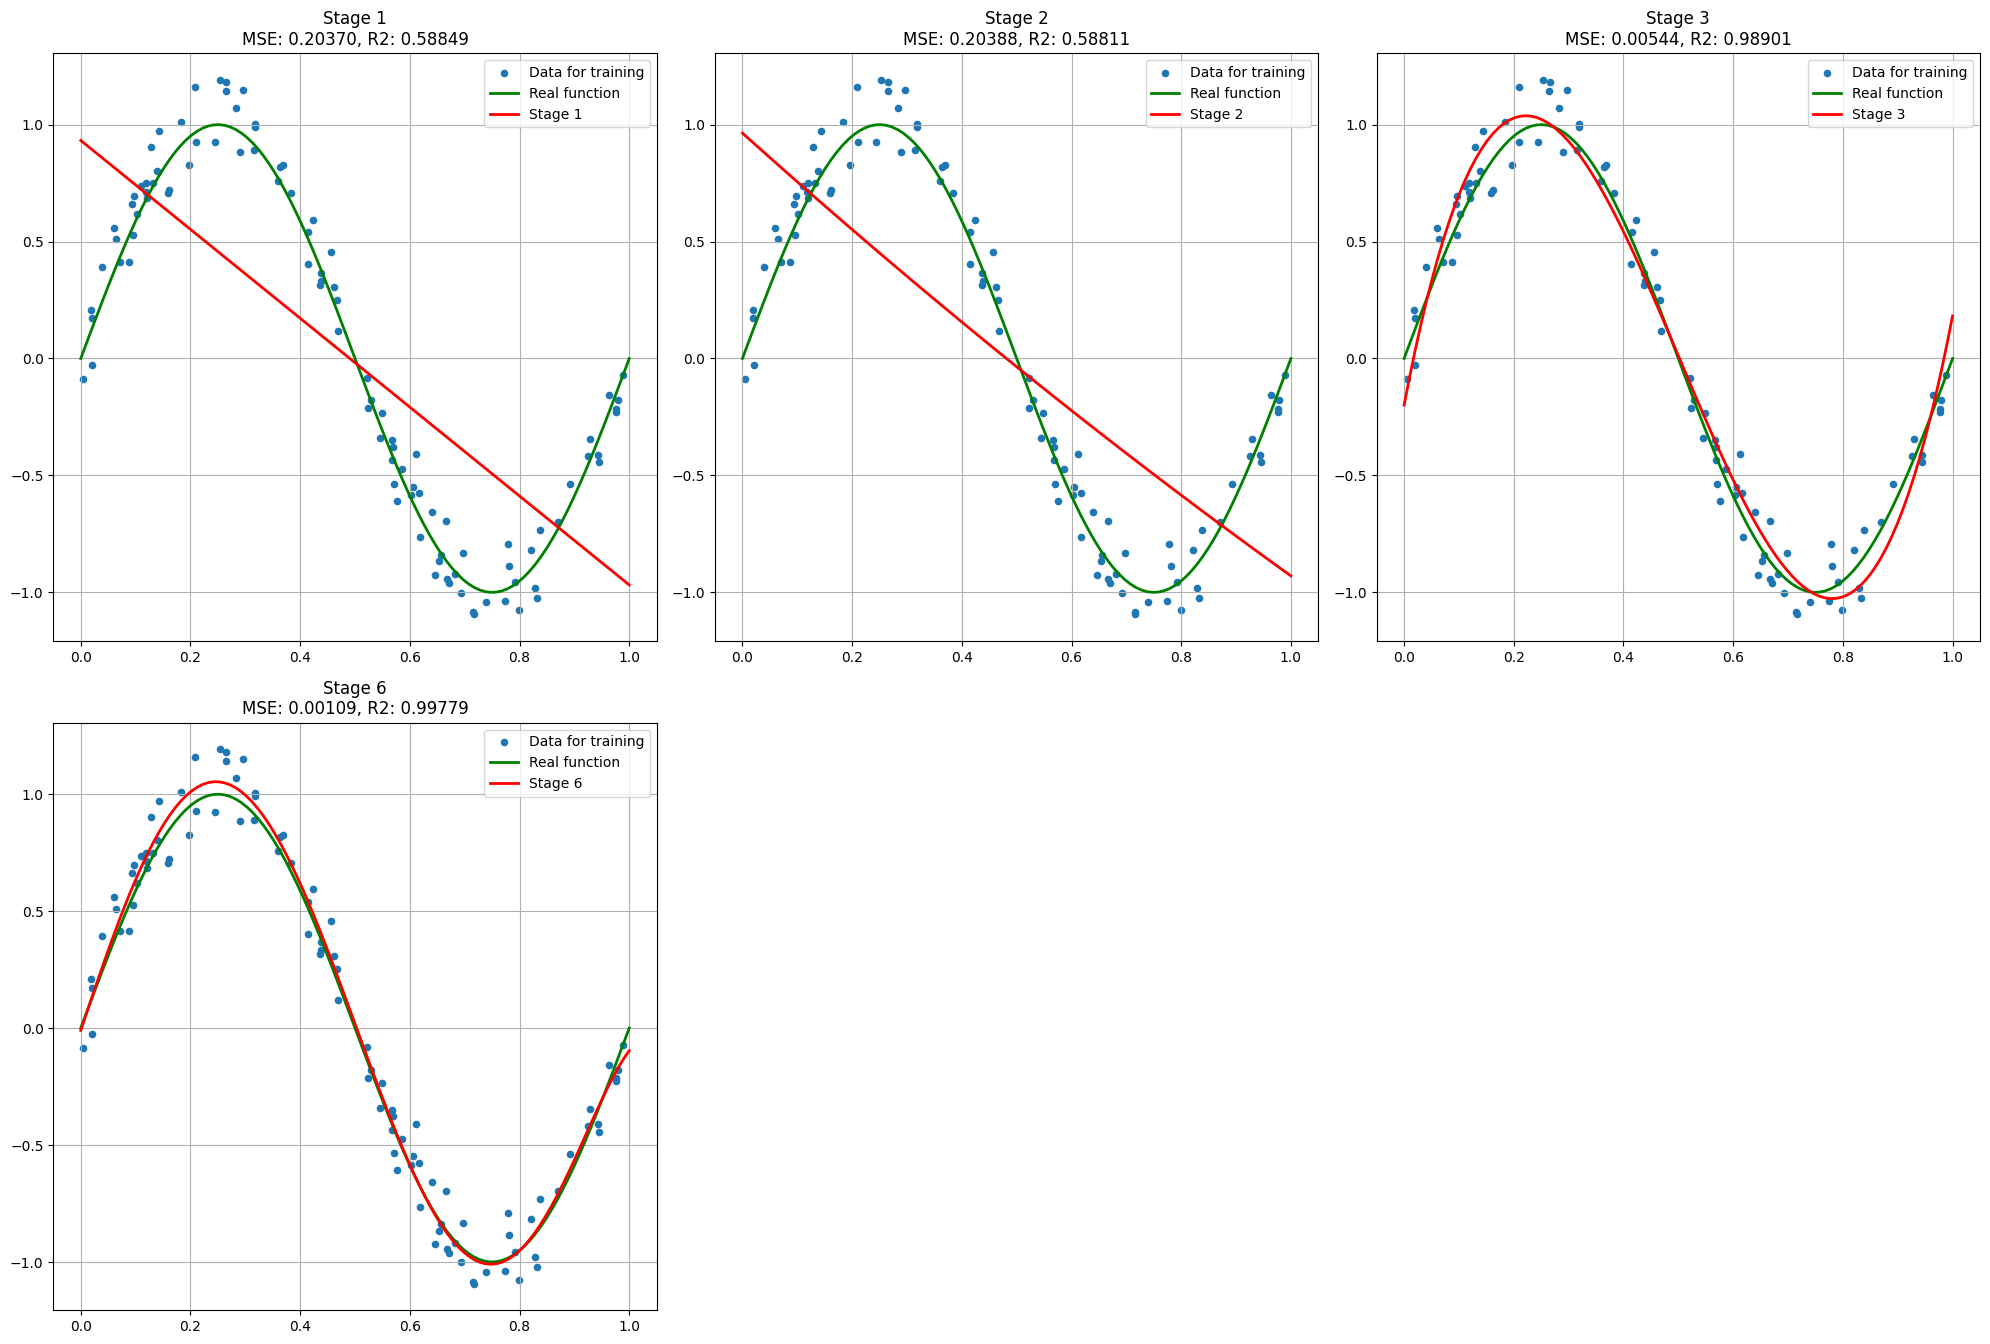

In [18]:
np.random.seed(0)
X_train = np.sort(np.random.rand(100))
y_train = np.sin(2 * np.pi * X_train) + np.random.normal(0, 0.1, 100)

X_test = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * X_test)

degrees = [1, 2, 3, 6]

plt.figure(figsize=(20, 20))

for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_train.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y_train)

    X_test_poly = poly_features.transform(X_test.reshape(-1, 1))
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    plt.subplot(3, 3, i + 1)
    plt.scatter(X_train, y_train, s=20, label='Data for training')
    plt.plot(X_test, y_true, label='Real function', linewidth=2, color='green')
    plt.plot(X_test, y_pred, label=f'Stage {degree}', linewidth=2, color='red')
    plt.title(f'Stage {degree}\nMSE: {mse:.5f}, R2: {r2:.5f}')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()